https://nbviewer.jupyter.org/urls/zgul.de/hypothesis-testing.ipynb

# Hypothesis Testing

In [6]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Setup plot default parameters

In [14]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

np.random.seed(13)

## Simulation Based Approach
__Example__: Codeup produced a scratch off lottery ticket called "Golden Gitty-Up". The odds of winning are advertised to the state of Texas.
> If Codeup produced the tickets they know how tickets are 'winners' and how many are 'losers'

__Theory__: Our `population` is 1,000 tickets.

__Implementation__: Model the win/loss ratio using pandas Series
- 250 tickets -> Win
- 750 tickets -> Loss
- 25% chance of a 'Win' ticket
- 1 in 4 chance of a 'Win' ticket

The actual probability of winning is 0.25


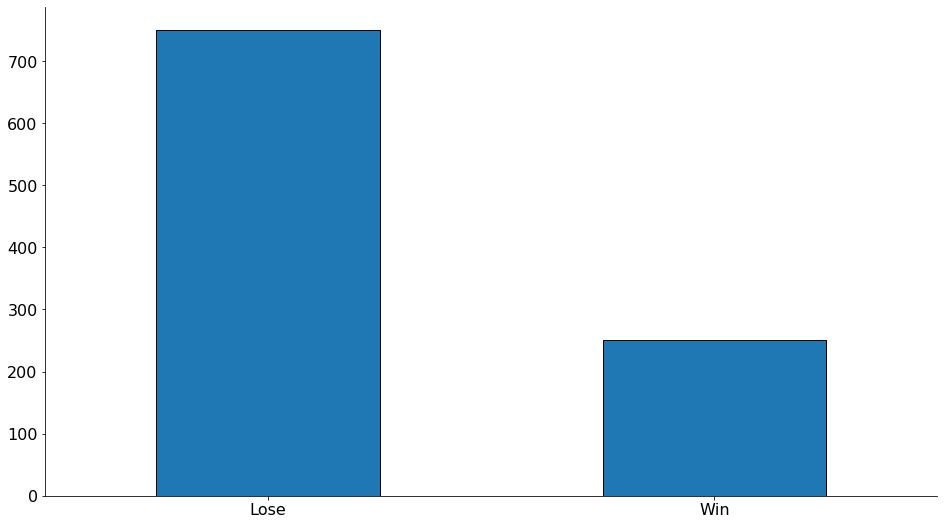

In [15]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

__Senario__:

Distributed to the town of Bronte, Texas, population 999. A hitchhiker is dropped off into town, receiving the last ticket.

__Theory__:

Take a random `sample` [BORING] and calculate the win rate. We're not going to see exactly 25% for each of our samples because they are just a piece of the population.
__Implementation__:

Use `pd.sample` to randomly choose 25 tickets, representing 25 Brontenites. Use `pd.mean` to calculate win rate of the sample.

In [51]:
citizens = 25
tickets.sample(citizens).mean()

0.32

__Senario__:
Each citizen in Bronte, Texas in is given a "Golden Gitty-Up".

__Theory__:
Each street is a portion of the population, 25 citizens each. The win rate, again, will not be exactly 25%.

__Implementation__:
Let's take a sample of one subdivision.

In [52]:
# this is a list comprehension that takes 5 random samples of 25 tickets.
[tickets.sample(citizens).mean() for _ in range(5)]

[0.2, 0.16, 0.2, 0.08, 0.36]

__Theory__:
Let's repeat this experiment 10,000 times.
> Win rates are expected to be normally distributed.

__Implementation__:
Simulate 10,000 subdivisions, each subdivision has 25 citizens.

In [ ]:
# simulation of 10,000
calculated_winrates = pd.Series([tickets.sample(citizens).mean() for _ in range(10000)])
calculated_winrates.plot.hist(bins=15)

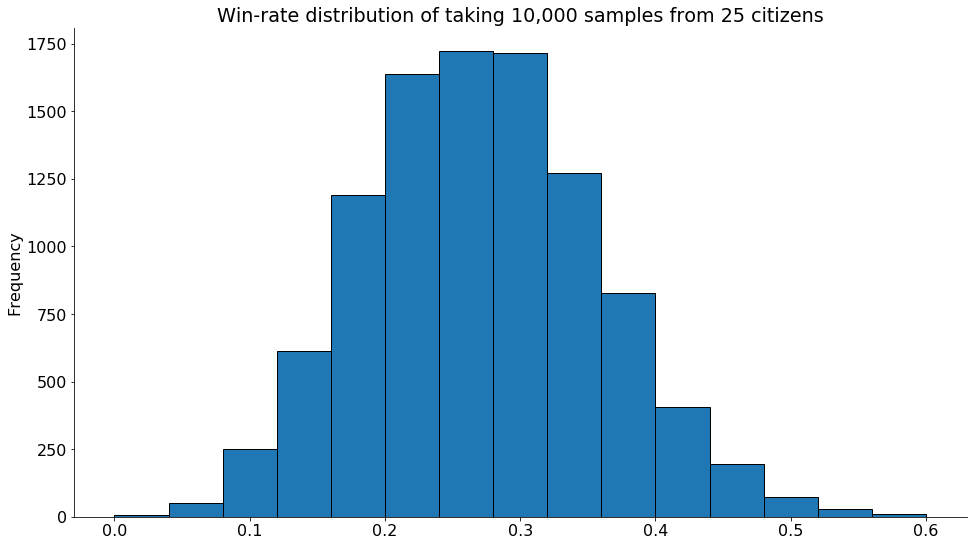

In [57]:
plt.title("Win-rate distribution of taking 10,000 samples from 25 citizens");

__Theory__:

The __Central Limit Theorem__ will be normally distributed even if the underlying random variable is not.



For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

> Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## 1.
https://www.keycdn.com/support/what-is-latency

### Has the network latency gone up since we switched internet service providers?

__Null Hypothesis__: 

> \$H0$ Internet service providers have no effect on network latency.

__Alternative Hypothesis__:

> \$Ha$ Internet service providers effect network latency.

__True Positive__: Internet service providers _do not_ effect network latency.
> Fail to reject the Null Hypothesis

__False Positive__: Internet service providers _do_ effect network latency.
> Reject the Null Hypothesis

__Type I__:

> $\alpha$ Reject \$H0$ when Internet service providers __do not__ effect network latency.

__Type II__: 

> $\beta$ Accept \$H0$ when Internet service providers __do__ effect network latency.

## 2.
### Is the website redesign any good?

__Null Hypothesis__: 
> \$H0$ The website redesign has no effect on the number of daily visitors.

__Alternative Hypothesis__:
> \$Ha$ The website redesign increased the number of daily visitors.

__True Positive__: The website redesign has no effect on the number of daily visitors.
> Fail to reject the Null Hypothesis

__False Positive__: The website redesign increased the number of daily visitors.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the website redesign has no effect on the number of daily visitors.

__Type II__: 
> $\beta$ Accept \$H0$ when the website redesign increased the number of daily visitors.

## 3.
### Is our television ad driving more sales?

__Null Hypothesis__: 
> \$H0$ The television ad had no effect on sales this month.

__Alternative Hypothesis__:

> \$Ha$ The television ad increased sales this month.

__True Positive__: The television ad had no effect on sales this month.
> Fail to reject the Null Hypothesis

__False Positive__: The television ad increased sales this month.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the television ad had no effect on sales this month.

__Type II__: 
>$\beta$ Accept \$H0$ when the television ad increased sales this month.